# Zamiana monet na obrazy

**ResNet**

Resztkowe bloki ułożone jeden na drugim, każdy blok zawiera mechanizm pomijania połączeń, sumuje wejście i wyjście bloku przed przekazaniem ich do następenj warstwy.

Warstwy wag - warstwy konwolucyjne z mechanizmem normalizacji egzemplarza

Blok resztkowy jest w models/CycleGAN_monet.py

* dużo warstw w głąb
* nie ma znikającago gradientu, wolne szkolenie
* błędy propagowane wstecz, mechanizm pomijania połączeń bloków resztkowych
* możliwość mapowania z poprzedniej warstwy 

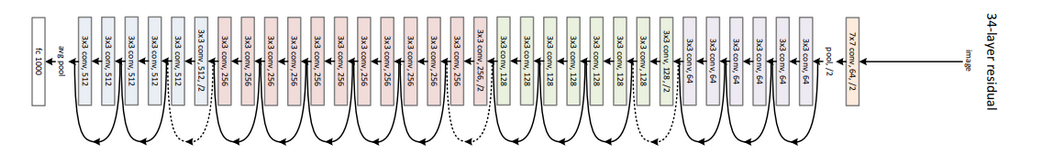

Downsampling:
* Conv2D (jądro 7x7, stride = 1)
* Conv2D (jądro 3x3, stride = 2)
Blok resztkowy

Upsampling:
* Conv2D transponowany (jądro 3x3, stride = 2)
* Conv2D (jądro 7x7, stride = 1)


In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

from models.cycleGAN_monet import CycleGAN
from utils.loaders import DataLoader

In [2]:
# run params
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'monet2photo'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' # 'build' # 

**Dane**

In [3]:
IMAGE_SIZE = 256

In [4]:
data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))

**Budowa sieci**

In [5]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 5
    , generator_type = 'resnet'
    , gen_n_filters = 32
    , disc_n_filters = 64
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Jak dobrać parametry?

In [6]:
gan.g_AB.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
reflection_padding2d (Reflectio (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 256, 256, 32) 4736        reflection_padding2d[0][0]       
__________________________________________________________________________________________________
instance_normalization_6 (Insta (None, 256, 256, 32) 0           conv2d_10[0][0]                  
____________________________________________________________________________________________

In [7]:
gan.g_BA.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
reflection_padding2d_2 (Reflect (None, 262, 262, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 256, 256, 32) 4736        reflection_padding2d_2[0][0]     
__________________________________________________________________________________________________
instance_normalization_29 (Inst (None, 256, 256, 32) 0           conv2d_32[0][0]                  
____________________________________________________________________________________________

In [8]:
gan.d_A.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
instance_normalization (Inst (None, 64, 64, 128)       0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       524544

In [9]:
gan.d_B.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
instance_normalization_3 (In (None, 64, 64, 128)       0         
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 256)       5245

**Trenowanie sieci**

In [10]:
BATCH_SIZE = 1
EPOCHS = 2
PRINT_EVERY_N_BATCHES = 10

TEST_A_FILE = 'n07740461_14740.jpg'
TEST_B_FILE = 'n07749192_4241.jpg'

In [11]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)

**Strata**

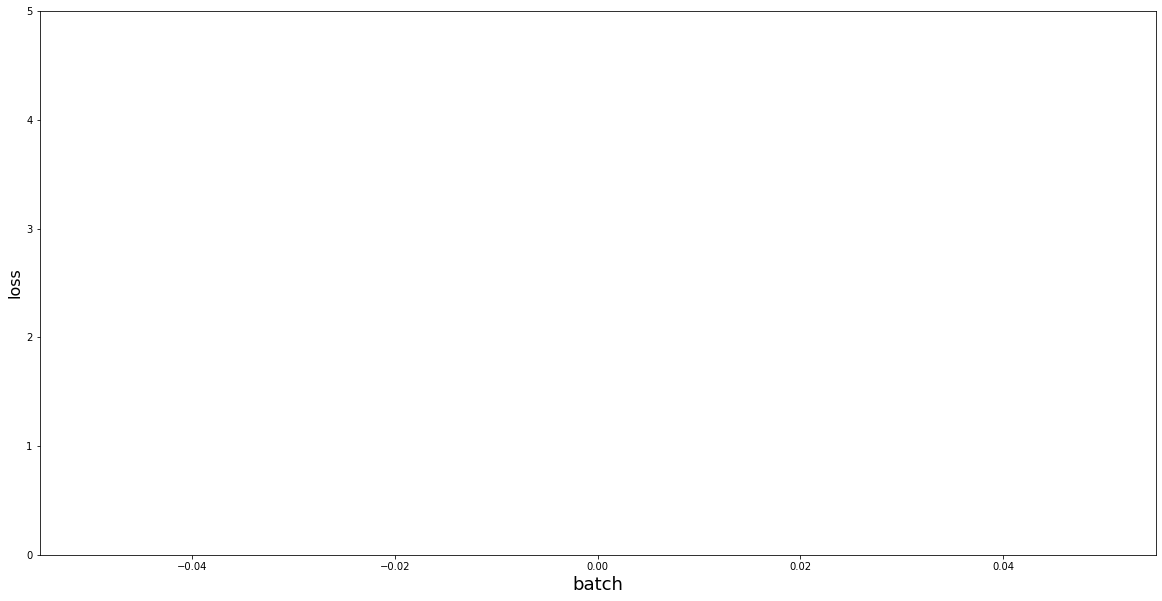

In [12]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()

**Testy**

1. Zamiana jabłek na pomarańcze i z powrotem

In [ ]:
from tensorflow import keras
import keras_contrib

In [ ]:
image = mpimg.imread('data/apple2orange/testA/n07740461_10211.jpg')
plt.axis('off')
plt.title("Jabłka przed")
plt.imshow(image)
plt.show()

#pip install git+https://www.github.com/keras-team/keras-contrib.git
#g_AB = keras.models.load_model('run/paint/0001_apple2orange/g_AB.h5', custom_objects={'InstanceNormalization':keras_contrib.layers.InstanceNormalization})
g_AB = keras.models.load_model('run/paint/0001_apple2orange/g_AB.h5')
image = g_AB(image)
plt.title("Jabłka po")
plt.imshow(image)
plt.show()



Setup 




In [ ]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

In [ ]:
pip install scipy

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!ls -lha kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d balraj98/apple2orange-dataset

In [ ]:
!unzip apple2orange-dataset